<a href="https://colab.research.google.com/github/AllanKamimura/AI/blob/master/Minicursos/RegressClassExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
# baixando os arquivos do meu google drive
from google_drive_downloader import GoogleDriveDownloader

file_id = "1J6NPYBI5p2X0XOaLbDFvJY0e35YhMBK7"

GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "./utils.zip",
    overwrite = True,
    unzip = True
)

Unzipping...Done.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf

# Regressão Linear

In [ ]:
# carrega os dados do arquivo CSV em um DataFrame (pandas)
df = pd.read_csv("/content/linear.csv")
df.head(10)

,x,y
0,-10.0,-37.850186
1,-10.0,-52.875433
2,-10.0,-46.561899
3,-10.0,-48.718775
4,-9.0,-26.151729
5,-9.0,-41.406372
6,-9.0,-53.773017
7,-9.0,-41.457460
8,-8.0,-24.047264
9,-8.0,-40.001800


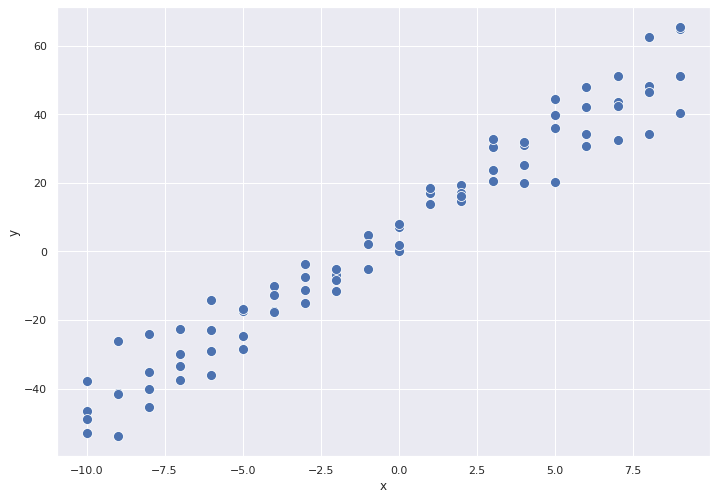

In [ ]:
# configura o tamanho do desenho
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plota os dados
_ = sns.scatterplot(data = df, x = "x", y = "y", s = 100)

In [ ]:
# sequential pega uma lista de camadas
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units = 1, input_shape = [1],
                           name = "camada1")]
)

# resumo
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
camada1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# adiciona o erro (mede o quão boa é a sua predição)
model.compile(
    loss = tf.keras.losses.mean_squared_error
)

In [ ]:
# treina o modelo
model.fit(x = df["x"], y =df["y"],
          epochs = 2000)

Epoch 1/2000
3/3 [==============================] - 1s 5ms/step - loss: 1115.4626
Epoch 2/2000
3/3 [==============================] - 0s 4ms/step - loss: 1113.0210
Epoch 3/2000
3/3 [==============================] - 0s 4ms/step - loss: 1111.4073
Epoch 4/2000
3/3 [==============================] - 0s 4ms/step - loss: 1110.0475
Epoch 5/2000
3/3 [==============================] - 0s 5ms/step - loss: 1108.8303
Epoch 6/2000
3/3 [==============================] - 0s 4ms/step - loss: 1107.6677
Epoch 7/2000
3/3 [==============================] - 0s 3ms/step - loss: 1106.4651
Epoch 8/2000
3/3 [==============================] - 0s 6ms/step - loss: 1105.2335
Epoch 9/2000
3/3 [==============================] - 0s 5ms/step - loss: 1104.0583
Epoch 10/2000
3/3 [==============================] - 0s 3ms/step - loss: 1102.8572
Epoch 11/2000
3/3 [==============================] - 0s 5ms/step - loss: 1101.7106
Epoch 12/2000
3/3 [==============================] - 0s 6ms/step - loss: 1100.5930
Epoch 13/2000

In [ ]:
# linspace cria uma lista de 50 numeros entre o menor e o maior valores de x
x_test = np.linspace(df["x"].min(), df["x"].max(), 50)

# faz a predição com os seus novos dados
y_pred = model.predict(x_test)

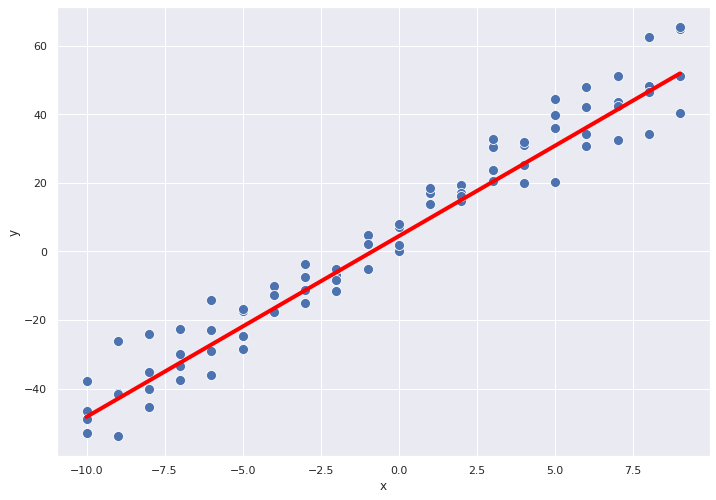

In [ ]:
# plota o grafico da reta com os pontos
_ = sns.lineplot(x = x_test, y = y_pred.squeeze(), color = "red", 
                 linewidth = 4)
_ = sns.scatterplot(data = df, x = "x", y = "y", s = 100)

In [ ]:
# pega os valores dos parametros da reta (coefs angular e linear)
camada = model.get_layer("camada1")
camada.weights

[<tf.Variable 'camada1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[4.914002]], dtype=float32)>,
 <tf.Variable 'camada1/bias:0' shape=(1,) dtype=float32, numpy=array([4.0943356], dtype=float32)>]

# Quadratico

In [ ]:
df_quadrado = pd.read_csv("/content/quadrado.csv")
df_quadrado.head(10)

,x,y
0,-10.0,131.321930
1,-9.0,108.870391
2,-8.0,89.703685
3,-7.0,70.381467
4,-6.0,54.515960
5,-5.0,41.795213
6,-4.0,28.474898
7,-3.0,19.458228
8,-2.0,11.587393
9,-1.0,4.886729


In [ ]:
np.random.rand(5)

array([-1.29403767,  0.76606155,  0.82358151, -0.29688579, -0.1948305 ])

In [ ]:
y = [y + np.rand()]

NameError: ignored

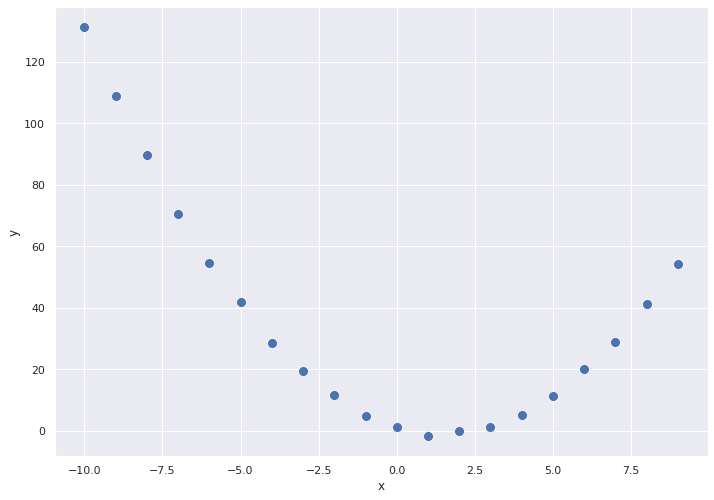

In [ ]:
_ = sns.scatterplot(data = df_quadrado, x = "x", y = "y", s = 100)

In [ ]:
# mais camadas, pq agora não é um modelo linear
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units = 16, activation = "relu", 
                           input_shape = [1]),
     tf.keras.layers.Dense(units = 4, activation = "relu"),
     tf.keras.layers.Dense(units = 1)]
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# optmizer: diz para o modelo como melhorar
model.compile(
    optimizer = "adam",
    loss = "mse"
)

In [ ]:
model.fit(x = df_quadrado["x"], y = df_quadrado["y"],
          epochs = 2000)

Epoch 1/2000
1/1 [==============================] - 0s 325ms/step - loss: 2781.5044
Epoch 2/2000
1/1 [==============================] - 0s 7ms/step - loss: 2777.0698
Epoch 3/2000
1/1 [==============================] - 0s 6ms/step - loss: 2772.6470
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 2768.2378
Epoch 5/2000
1/1 [==============================] - 0s 10ms/step - loss: 2763.8547
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 2760.3145
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 2757.3887
Epoch 8/2000
1/1 [==============================] - 0s 11ms/step - loss: 2754.7339
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 2752.0537
Epoch 10/2000
1/1 [==============================] - 0s 6ms/step - loss: 2749.3218
Epoch 11/2000
1/1 [==============================] - 0s 4ms/step - loss: 2746.5586
Epoch 12/2000
1/1 [==============================] - 0s 4ms/step - loss: 2743.7749
Epoch 13

In [ ]:
x_test = np.linspace(df_quadrado["x"].min(), df_quadrado["x"].max(), 50)

y_pred = model.predict(x_test)

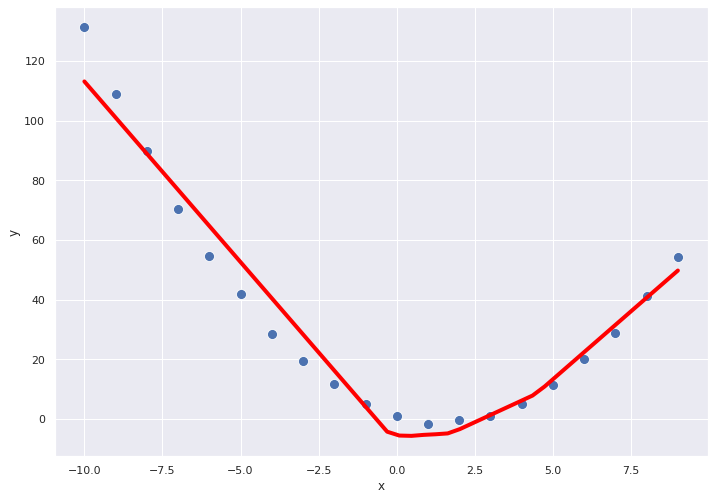

In [ ]:
_ = sns.lineplot(x = x_test, y = y_pred.squeeze(), color = "red", 
                 linewidth = 4)
_ = sns.scatterplot(data = df_quadrado, x = "x", y = "y", s = 100)

# Linguagem de Sinais

from https://www.kaggle.com/datamunge/sign-language-mnist

In [ ]:

# label é a classificação da imagem
# e cada coluna contem um pixel da imagem
train_df = pd.read_csv("/content/sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
y_train = train_df["label"]
x_train = train_df.drop("label", axis = 1) # todas as colunas meno a label

In [ ]:
# a validação é utilizada apenas na hora da predição
# para verificar se de fato o modelo aprendeu alguma coisa
val_df = pd.read_csv("/content/sign_mnist_test.csv")
y_val = val_df["label"]
x_val = val_df.drop("label", axis = 1)

In [ ]:
y_train.shape

(27455,)

In [ ]:
# 27455 imagens com 784 pixels cada
x_train.shape

(27455, 784)

In [ ]:
np.set_printoptions(edgeitems = 30, linewidth = 100000)
test_image = np.reshape(x_train.iloc[2].values, newshape = (28,28)) 
test_image

array([[187, 188, 188, 187, 187, 186, 187, 188, 187, 186, 185, 185, 185, 184, 184, 184, 181, 181, 179, 179, 179, 178, 178, 109,  52,  66,  77,  83],
       [188, 189, 189, 188, 188, 189, 188, 188, 188, 188, 187, 185, 185, 187, 182, 177, 182, 182, 182, 180, 180, 179, 180, 135,  67,  73,  73,  71],
       [190, 190, 190, 191, 190, 190, 189, 189, 189, 188, 189, 188, 192, 184, 144, 103, 144, 142, 138, 186, 182, 180, 182, 163,  81,  74,  68,  61],
       [191, 193, 192, 192, 192, 191, 191, 191, 191, 195, 200, 189, 165, 127,  98,  71,  85,  94,  86, 165, 184, 182, 182, 175,  87,  61,  51,  56],
       [192, 193, 194, 193, 193, 193, 194, 191, 202, 208, 193, 130,  95,  78,  69,  62,  69,  72,  69,  83, 179, 184, 183, 184, 116,  43,  38,  56],
       [193, 193, 194, 195, 195, 195, 195, 196, 209, 193, 144,  83,  58,  61,  62,  52,  60,  65,  66,  70, 176, 187, 184, 185, 158,  45,  35,  45],
       [194, 194, 195, 196, 196, 197, 195, 208, 212, 133,  86,  67,  52,  52,  60,  61,  63,  73,  91, 150

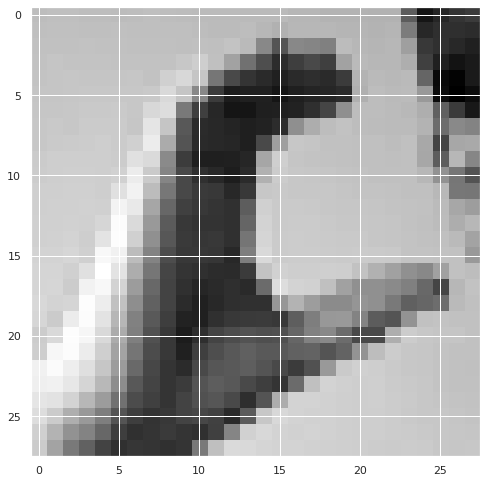

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(test_image, cmap = "gray")

In [ ]:
y_train.iloc[2]

2

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape = [28*28]),
     tf.keras.layers.Dense(units = 256, activation = "relu"),
     tf.keras.layers.Dense(units = 128, activation = "relu"),
     tf.keras.layers.Dense(units = 64, activation = "relu"),
     tf.keras.layers.Dense(units = 25, activation = "softmax")
    ])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 25)                1625      
Total params: 243,737
Trainable params: 243,737
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = "adam",
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    metrics = "accuracy"
)

In [ ]:
model.fit(x = x_train / 255, y = y_train,
          epochs = 20,
          validation_data = (x_val / 255, y_val))

Epoch 1/20
858/858 [==============================] - 4s 5ms/step - loss: 1.9903 - accuracy: 0.3666 - val_loss: 1.6760 - val_accuracy: 0.4345
Epoch 2/20
858/858 [==============================] - 4s 4ms/step - loss: 0.9958 - accuracy: 0.6659 - val_loss: 1.2139 - val_accuracy: 0.6185
Epoch 3/20
858/858 [==============================] - 4s 4ms/step - loss: 0.5724 - accuracy: 0.8052 - val_loss: 1.1530 - val_accuracy: 0.6479
Epoch 4/20
858/858 [==============================] - 4s 4ms/step - loss: 0.3662 - accuracy: 0.8771 - val_loss: 1.1909 - val_accuracy: 0.6596
Epoch 5/20
858/858 [==============================] - 4s 4ms/step - loss: 0.2206 - accuracy: 0.9302 - val_loss: 1.1687 - val_accuracy: 0.6853
Epoch 6/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1426 - accuracy: 0.9543 - val_loss: 1.0828 - val_accuracy: 0.7501
Epoch 7/20
858/858 [==============================] - 4s 4ms/step - loss: 0.1266 - accuracy: 0.9596 - val_loss: 1.1988 - val_accuracy: 0.7433
Epoch 

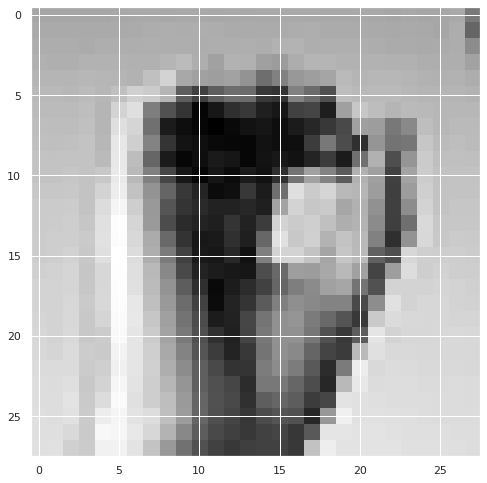

In [ ]:
val_image = np.reshape(x_val.iloc[7].values, newshape = (28,28))
plt.imshow(val_image, cmap = "gray")

In [ ]:
predicts = model.predict(x_val / 255)

In [ ]:
predicts.shape

(7172, 25)

In [ ]:
alfabeto = ["a", "b", "c", "d", "e",
            "f", "g", "h", "i", "j",
            "k", "l", "m", "n", "o", 
            "p", "q", "r", "s", "t", 
            "u", "v", "w", "x", "y"]

In [ ]:
# a imagem numero 7 é classificada com um vetor com 25 elementos
# cada numero representa uma probabilidade e a posição no vetor representa a letra
predicts[7]

array([2.6609680e-13, 8.4753042e-20, 1.1631802e-10, 0.0000000e+00, 1.4533758e-09, 2.1808114e-06, 4.9364629e-26, 3.9059525e-21, 4.6900400e-10, 3.6283775e-30, 3.1938939e-31, 0.0000000e+00, 5.3347797e-26, 2.1026218e-22, 9.9999785e-01, 1.5846605e-16, 7.2944097e-22, 0.0000000e+00, 1.0928228e-11, 1.9673591e-20, 0.0000000e+00, 2.2708707e-34, 1.7717121e-31, 2.2615418e-20, 3.7017679e-27], dtype=float32)

In [ ]:
# pegando a posição com o maior valor
tf.argmax(predicts[7]).numpy()

14

In [ ]:
# pegando o mesmo elemento na lista de letras
alfabeto[tf.argmax(predicts[7]).numpy()]

'o'

# Boston Medical Group

from https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# carrega o dataset
estate_df = datasets.load_boston()

In [ ]:
pd.DataFrame(estate_df["data"], columns = estate_df["feature_names"]).head(7)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43


In [ ]:
# pega as colunas com os inputs e os labels
X, y = estate_df.data, estate_df.target

# separa em parte para treinamento e parte para validação
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 2, test_size = 0.25)

In [ ]:
# coloca todas as colunas com a mesma ordem de grandeza
# isso faz com q o modelo não pense que uma variavel é mais importante so pq ela é maior
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_val_scaled = sc.transform(X_val)

In [ ]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units = 64, activation = "relu", input_shape = [13]),
     tf.keras.layers.Dense(units = 16, activation = "relu"),
     tf.keras.layers.Dense(units = 4, activation = "relu"),
     tf.keras.layers.Dense(units = 1, activation = "relu"),]
)

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "mse"
)

In [ ]:
model.fit(x = X_train_scaled, y = y_train, 
          validation_data = (X_val_scaled, y_val),
          epochs = 100)

Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 573.7834 - val_loss: 590.5305
Epoch 2/100
12/12 [==============================] - 0s 3ms/step - loss: 554.6486 - val_loss: 564.6726
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 527.9385 - val_loss: 529.4880
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 491.8039 - val_loss: 483.9066
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 445.8516 - val_loss: 425.0029
Epoch 6/100
12/12 [==============================] - 0s 5ms/step - loss: 386.2069 - val_loss: 353.6555
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 317.8130 - val_loss: 273.8041
Epoch 8/100
12/12 [==============================] - 0s 4ms/step - loss: 244.2071 - val_loss: 196.7469
Epoch 9/100
12/12 [==============================] - 0s 5ms/step - loss: 178.9745 - val_loss: 134.3887
Epoch 10/100
12/12 [==============================] - 0s 3ms/step - loss

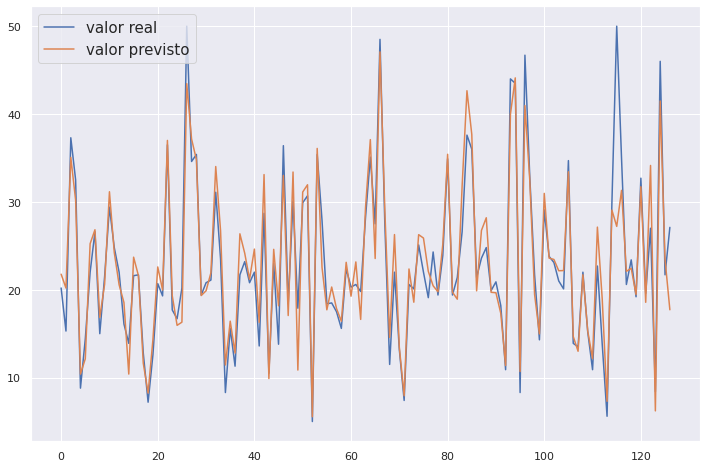

In [ ]:
y_pred = model.predict(X_val_scaled)

df = pd.DataFrame({"valor real": y_val, "valor previsto": y_pred.squeeze()})

plt.figure(figsize = (12,8))
_ = plt.plot(df)
_ = plt.legend(["valor real", "valor previsto"], fontsize = 15)

# Bonus: Fazendo GIFs

In [ ]:
!mkdir ./grafico_casas
# função de desenhar graficos
def draw_graph(x_l, y_l, batch, logs):

    plt.figure(figsize = (12,8))
    y_pred = model.predict(x_l)

    df = pd.DataFrame({"valor real": y_l, "valor previsto": y_pred.squeeze()})

    _ = plt.plot(df)
    _ = plt.legend(["valor real", "valor previsto"], fontsize = 15)

    # colocar titulo no grafico
    batch_number = str(batch).zfill(4) # transforma a string "3" em "003", por exemplo
    loss = logs["loss"] # dentro dos logs, pega o valor da perda
    plt.title("Epoch: {}, Loss: {}".format(batch_number, loss), color = "green")

    # salva a figura com o nome sendo o numero da epoca
    plt.savefig("/content/grafico_casas/{}.png".format(batch_number))

    # mostra o desenho completo
    # plt.show()

    plt.close()

In [ ]:
# criando um callback
class CustomCallback( tf.keras.callbacks.Callback):
    # executa essa função toda vez que uma epoca acab
    def on_epoch_end(self, batch, logs): # batch é o numero da epoca e logs é um dicionario com valores como o "loss"
        if batch < 400:
            if (batch) % 2 == 0:
                draw_graph(X_val_scaled, y_val, batch, logs)
        elif (batch) % 50 == 0:
            draw_graph(X_val_scaled, y_val, batch, logs)

In [ ]:
# criando o modelo

# 1) passa uma lista com os layers do seu modelo, cada layer tem o seu numero de units
# pra adicionar outro layer, é como itens de uma lista, coloca virgula e escreve o proximo
model = tf.keras.Sequential([tf.keras.layers.Dense(units = 16, input_shape = [13], activation = "relu"),
                             tf.keras.layers.Dense(units = 4, activation = "relu"),
                             tf.keras.layers.Dense(units = 1, activation = "relu")])

# 2) como calcular o erro do seu modelo (loss) e como melhorar, diminuir esse erro (optimizer)
model.compile(loss = "mse", 
              optimizer = "adam")

# 3) colocando os dados no modelo
model.fit(x = X_train_scaled, y = y_train, epochs = 2001, verbose = 1,
          validation_data = (X_val_scaled, y_val),
          callbacks = [CustomCallback()])

Epoch 1/2001
12/12 [==============================] - 0s 12ms/step - loss: 562.7092 - val_loss: 591.0925
Epoch 2/2001
12/12 [==============================] - 0s 3ms/step - loss: 561.8963 - val_loss: 590.1811
Epoch 3/2001
12/12 [==============================] - 0s 4ms/step - loss: 561.0966 - val_loss: 589.2388
Epoch 4/2001
12/12 [==============================] - 0s 3ms/step - loss: 560.2684 - val_loss: 588.2902
Epoch 5/2001
12/12 [==============================] - 0s 3ms/step - loss: 559.4579 - val_loss: 587.3004
Epoch 6/2001
12/12 [==============================] - 0s 3ms/step - loss: 558.5994 - val_loss: 586.3224
Epoch 7/2001
12/12 [==============================] - 0s 4ms/step - loss: 557.7370 - val_loss: 585.3262
Epoch 8/2001
12/12 [==============================] - 0s 4ms/step - loss: 556.8533 - val_loss: 584.3099
Epoch 9/2001
12/12 [==============================] - 0s 5ms/step - loss: 555.9474 - val_loss: 583.2773
Epoch 10/2001
12/12 [==============================] - 0s 3ms/s

In [ ]:
# criar o GIF
import os
import imageio

imageio.plugins.freeimage.download()

graph_list = os.listdir("/content/grafico_casas") # lista de arquivos dentro da pasta
graph_list = sorted(graph_list) # coloca os arquivos em ordem alfabetica

images = []

for image_file in graph_list: # pra cada arquivo dentro da pasta,
    image = imageio.imread("/content/grafico_casas/" + image_file) # ler o arquivo e armazenar em uma variavel
    images.append(image) # adicionar a image à lista de imagens

imageio.mimsave("/content/casas.gif", images, "GIF-FI", fps = 10) # fazer um GIF com a lista de imagens

Imageio: 'libfreeimage-3.16.0-linux64.so' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/freeimage/libfreeimage-3.16.0-linux64.so (4.6 MB)
Downloading: 8192/4830080 bytes (0.2%)860160/4830080 bytes (17.8%)2408448/4830080 bytes (49.9%)4374528/4830080 bytes (90.6%)4830080/4830080 bytes (100.0%)
  Done
File saved as /root/.imageio/freeimage/libfreeimage-3.16.0-linux64.so.
